In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px
from matplotlib.lines import Line2D  
import numpy as np

In [2]:
df_gps = pd.read_csv("data/gps_lab4.csv", delimiter=',', skiprows=0, low_memory=False)
print(df_gps.shape)
df_stat = df_gps[:][:40]
df_circle = df_gps[:][50:100]
df_move = df_gps[:][180:780]
gps_timestamp = [df_gps['field.header.stamp'][50], df_gps['field.header.stamp'][150], df_gps['field.header.stamp'][180], df_gps['field.header.stamp'][780]]
print(df_gps.keys())

(802, 11)
Index(['%time', 'field.header.seq', 'field.header.stamp',
       'field.header.frame_id', 'field.latitude', 'field.longitude',
       'field.altitude', 'field.utm_easting', 'field.utm_northing',
       'field.zone', 'field.letter'],
      dtype='object')


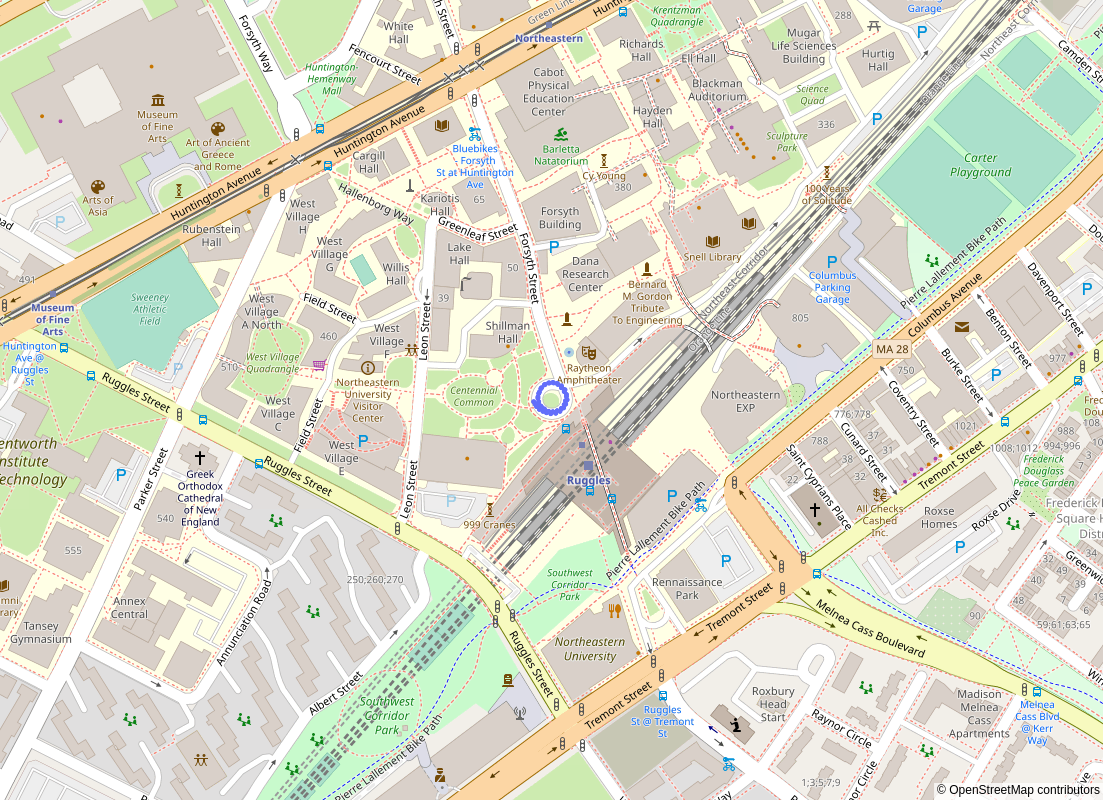

In [3]:
fig = px.scatter_mapbox(df_circle, 
                        lat="field.latitude", 
                        lon="field.longitude", 
                        hover_name="field.header.stamp", 
                        zoom=16, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [4]:
df_imu = pd.read_csv("data/imu_lab4.csv", delimiter=',', skiprows=0, low_memory=False)
print(df_imu.keys())


Index(['%time', 'field.Header.seq', 'field.Header.stamp',
       'field.Header.frame_id', 'field.IMU.orientation.x',
       'field.IMU.orientation.y', 'field.IMU.orientation.z',
       'field.IMU.orientation.w', 'field.IMU.angular_velocity.x',
       'field.IMU.angular_velocity.y', 'field.IMU.angular_velocity.z',
       'field.IMU.linear_acceleration.x', 'field.IMU.linear_acceleration.y',
       'field.IMU.linear_acceleration.z', 'field.MagField.magnetic_field.x',
       'field.MagField.magnetic_field.y', 'field.MagField.magnetic_field.z'],
      dtype='object')


In [5]:
# Function to find the biggest number <= target number


def find_closest_number(arr, target):
    return np.argmax(arr[arr <= target])

results = []
# Apply the function to the list of keys using list comprehension
for key in gps_timestamp:
    results.append(find_closest_number(df_imu['field.Header.stamp'], key))
    # print(key)

print(results)
# print(df_imu['field.Header.stamp'])

[2024, 6024, 7224, 31224]


In [6]:
df_mag = df_imu[:][2424:4024]
print(df_mag)

             %time  field.Header.seq  field.Header.stamp  \
2424  1.698243e+18              3741        1.698243e+18   
2425  1.698243e+18              3742        1.698243e+18   
2426  1.698243e+18              3743        1.698243e+18   
2427  1.698243e+18              3744        1.698243e+18   
2428  1.698243e+18              3745        1.698243e+18   
...            ...               ...                 ...   
4019  1.698243e+18              5336        1.698243e+18   
4020  1.698243e+18              5337        1.698243e+18   
4021  1.698243e+18              5338        1.698243e+18   
4022  1.698243e+18              5339        1.698243e+18   
4023  1.698243e+18              5340        1.698243e+18   

     field.Header.frame_id  field.IMU.orientation.x  field.IMU.orientation.y  \
2424            IMU1_Frame                -0.026555                 0.007469   
2425            IMU1_Frame                -0.026456                 0.007419   
2426            IMU1_Frame             

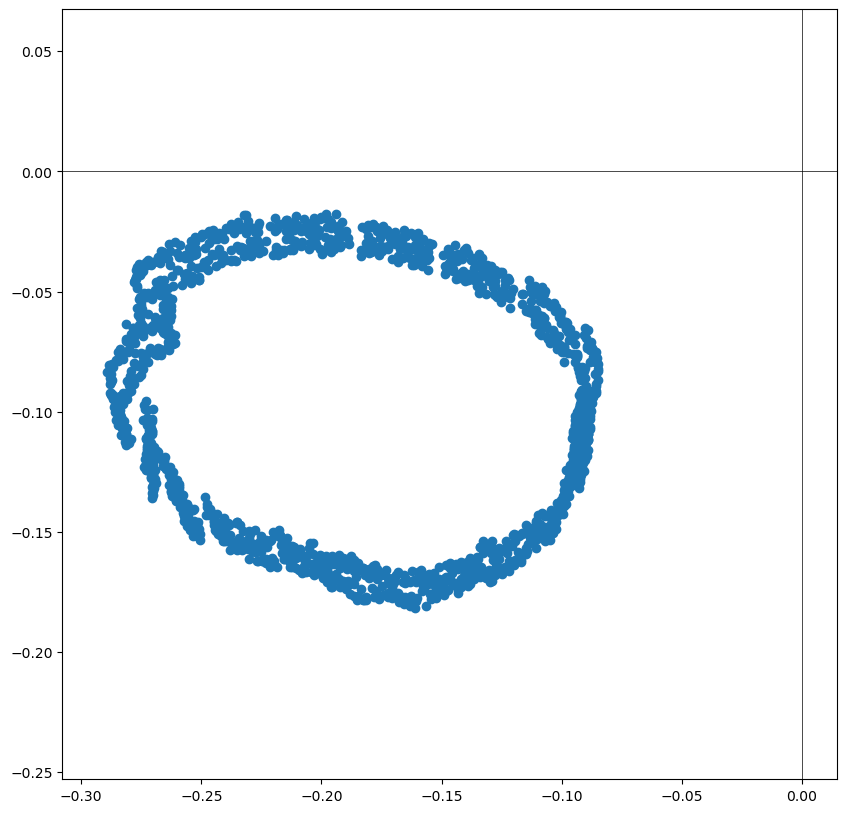

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(x=df_mag['field.MagField.magnetic_field.x'], y=df_mag['field.MagField.magnetic_field.y'])
plt.axis('equal')
plt.axhline(0, color='black', linewidth=0.5)  # Horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Vertical line at x=0
plt.show()

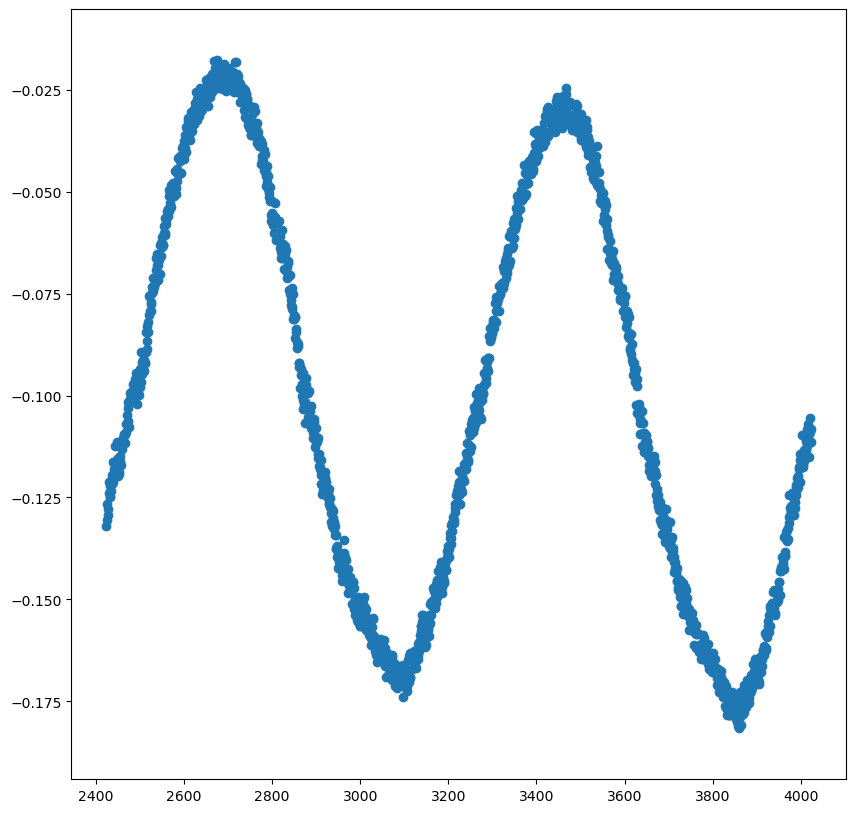

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(x=df_mag.index , y=df_mag['field.MagField.magnetic_field.y'])
# plt.axis('equal')
plt.show()

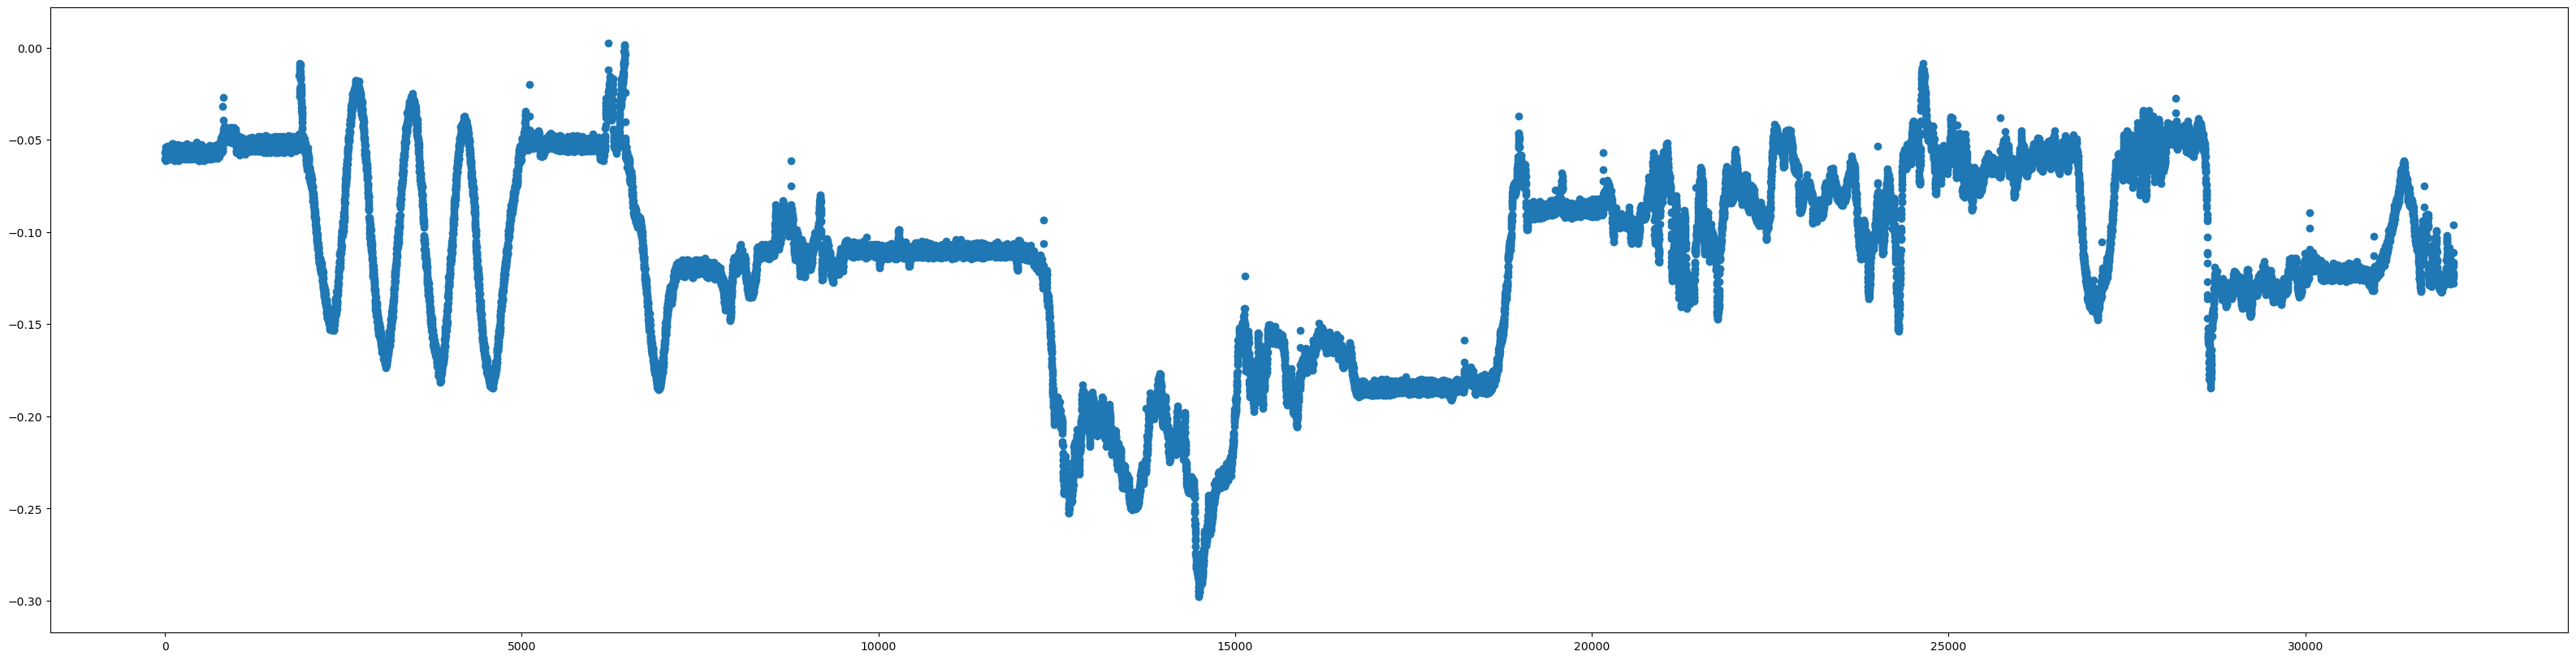

In [9]:
plt.figure(figsize=(40,10))
plt.scatter(x=df_imu.index , y=df_imu['field.MagField.magnetic_field.y'])
# plt.axis('equal')
plt.show()

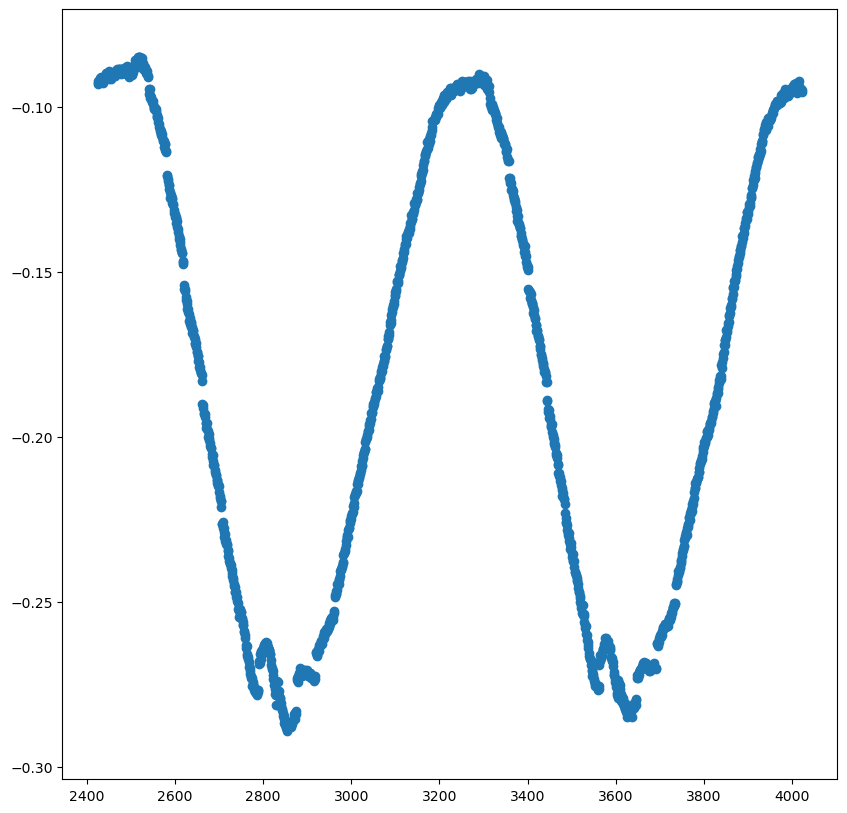

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(x=df_mag.index , y=df_mag['field.MagField.magnetic_field.x'])

plt.show()

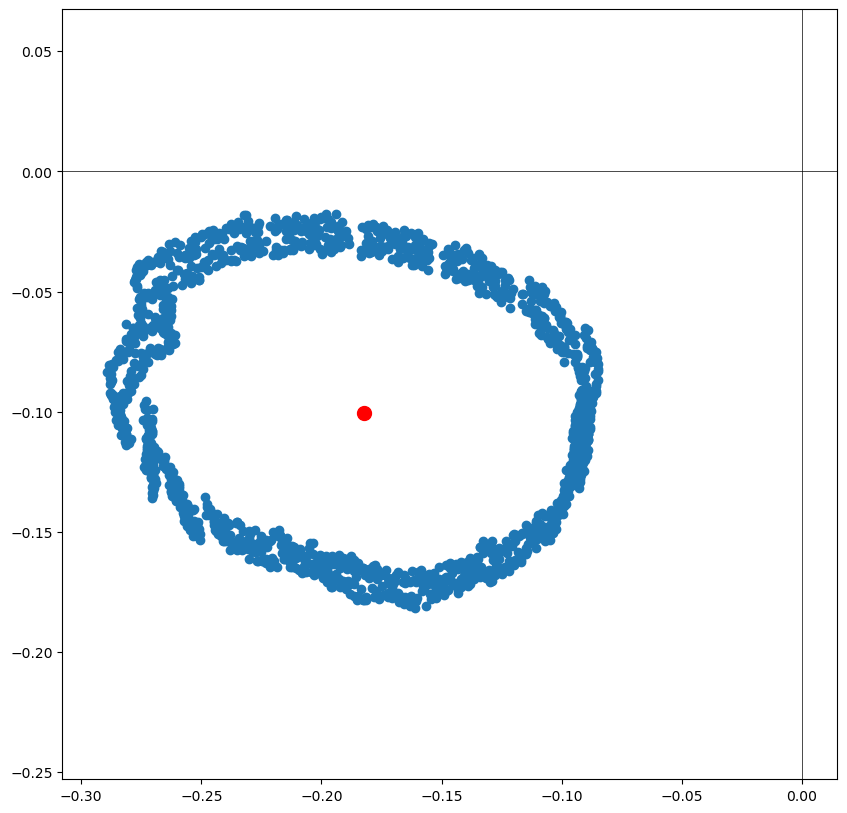

In [11]:
x_off = df_mag['field.MagField.magnetic_field.x'].mean()
y_off = df_mag['field.MagField.magnetic_field.y'].mean()

plt.figure(figsize=(10,10))
plt.scatter(x=df_mag['field.MagField.magnetic_field.x'], y=df_mag['field.MagField.magnetic_field.y'])
plt.axis('equal')
plt.axhline(0, color='black', linewidth=0.5)  # Horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Vertical line at x=0
plt.scatter(x_off, y_off, color='red', marker='o', s=100, label='Point')
plt.show()

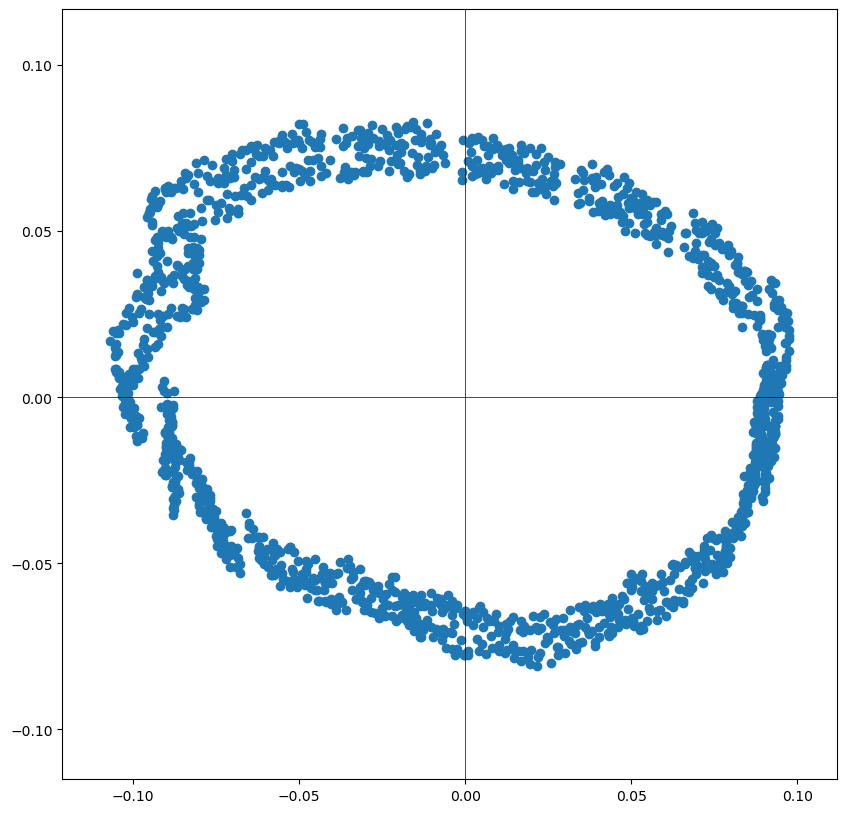

In [12]:
df_mag['Mag_x_hard'] = df_mag['field.MagField.magnetic_field.x'] - x_off
df_mag['Mag_y_hard'] = df_mag['field.MagField.magnetic_field.y'] - y_off


plt.figure(figsize=(10,10))
plt.scatter(x=df_mag['Mag_x_hard'], y=df_mag['Mag_y_hard'])
plt.axis('equal')
plt.axhline(0, color='black', linewidth=0.5)  # Horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Vertical line at x=0

plt.show()

-0.09434100000000001 0.060710812499999996
0.11218746380683609 147.23769728378366
0.05811041460366771 -158.5599023256998


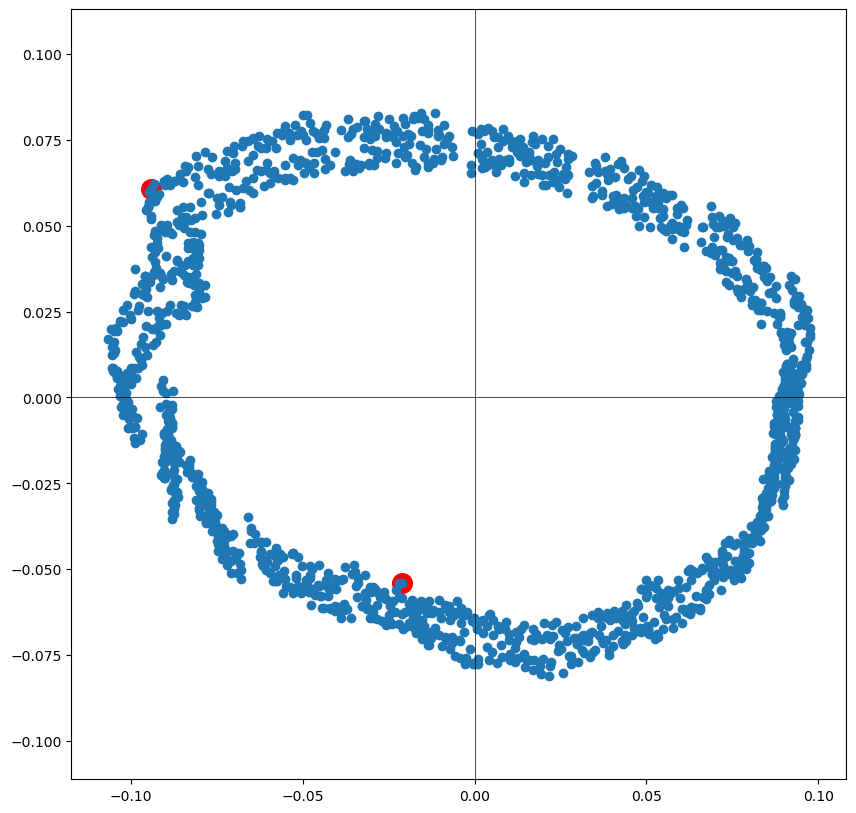

In [13]:
import math
# from pandas.DataFrame import to_numpy

x = df_mag['Mag_x_hard'].to_numpy()
y = df_mag['Mag_y_hard'].to_numpy()
# print(x)
distances = np.sqrt(x**2 + y**2)

farthest_point_index = np.argmax(distances)


print(x[farthest_point_index], y[farthest_point_index])

r_ellipse = distances[farthest_point_index]
theta = math.acos(x[farthest_point_index]/r_ellipse)
print(r_ellipse, math.degrees(theta))

closest_point_index = np.argmin(distances)
theta2 = math.atan2(x[closest_point_index], y[closest_point_index])
q_ellipse = distances[closest_point_index]

print(q_ellipse,math.degrees(theta2))
plt.figure(figsize=(10,10))
plt.scatter(x[farthest_point_index], y[farthest_point_index], color='red', marker='o', s=200, label='Point')
plt.scatter(x[closest_point_index], y[closest_point_index], color='red', marker='o', s=200, label='Point')
plt.scatter(x, y)
plt.axis('equal')
plt.axhline(0, color='black', linewidth=0.5)  # Horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Vertical line at x=0

plt.show()

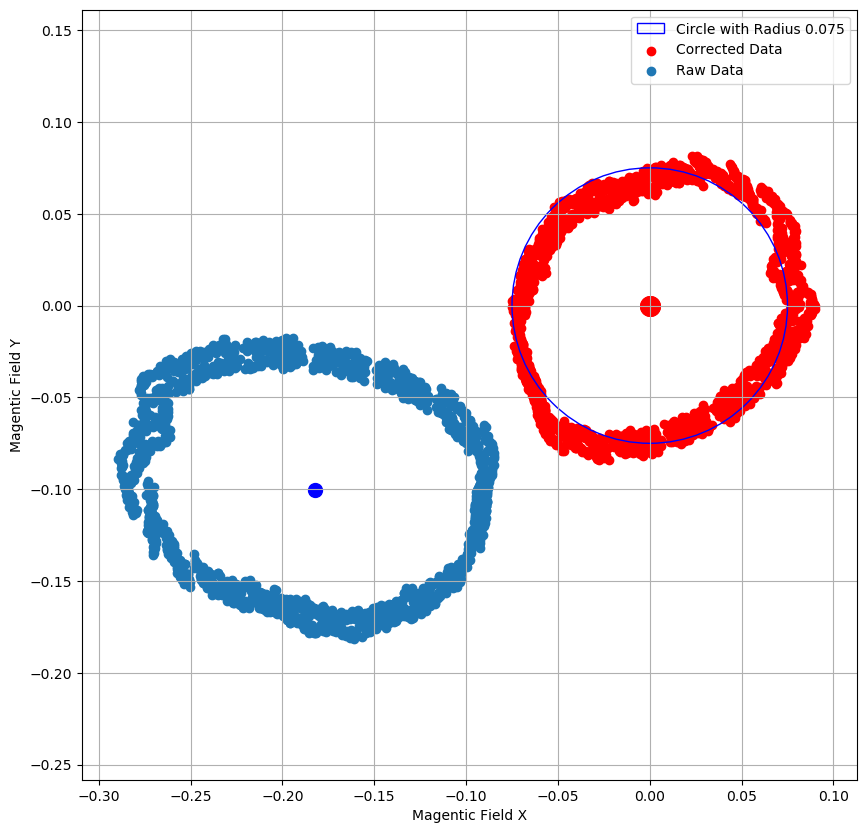

In [14]:
df_mag['Magx_rotated1'] = (df_mag['Mag_x_hard'] * np.cos(-theta) - df_mag['Mag_y_hard']* np.sin(-theta))/1.25
df_mag['Magy_rotated1'] = (df_mag['Mag_x_hard'] * np.sin(-theta) + df_mag['Mag_y_hard']* np.cos(-theta))


# Plot original and rotated data
plt.figure(figsize=(10, 10))

plt.scatter(df_mag['Magx_rotated1'], df_mag['Magy_rotated1'], color='red', label='Corrected Data')
plt.scatter(x=df_mag['field.MagField.magnetic_field.x'], y=df_mag['field.MagField.magnetic_field.y'], label='Raw Data')
plt.scatter(0, 0, color='red', marker='o', s=200)
plt.scatter(x_off, y_off, color='blue', marker='o', s=100)
plt.xlabel('Magentic Field X')
plt.ylabel('Magentic Field Y')
radius = 0.075
plt.scatter(0, 0, color='red', marker='o', s=200)

# Create a circle with center at (0, 0) and given radius
circle = plt.Circle((0, 0), radius, color='blue', fill=False, label=f'Circle with Radius {radius}')


# Plot the circle
plt.gca().add_patch(circle)
# plt.legend()
plt.axis('equal')
plt.grid(True)
plt.legend()
# plt.title(f'Data Rotated by {theta} radians')
plt.savefig('Corrected Magnetic field')
plt.show()

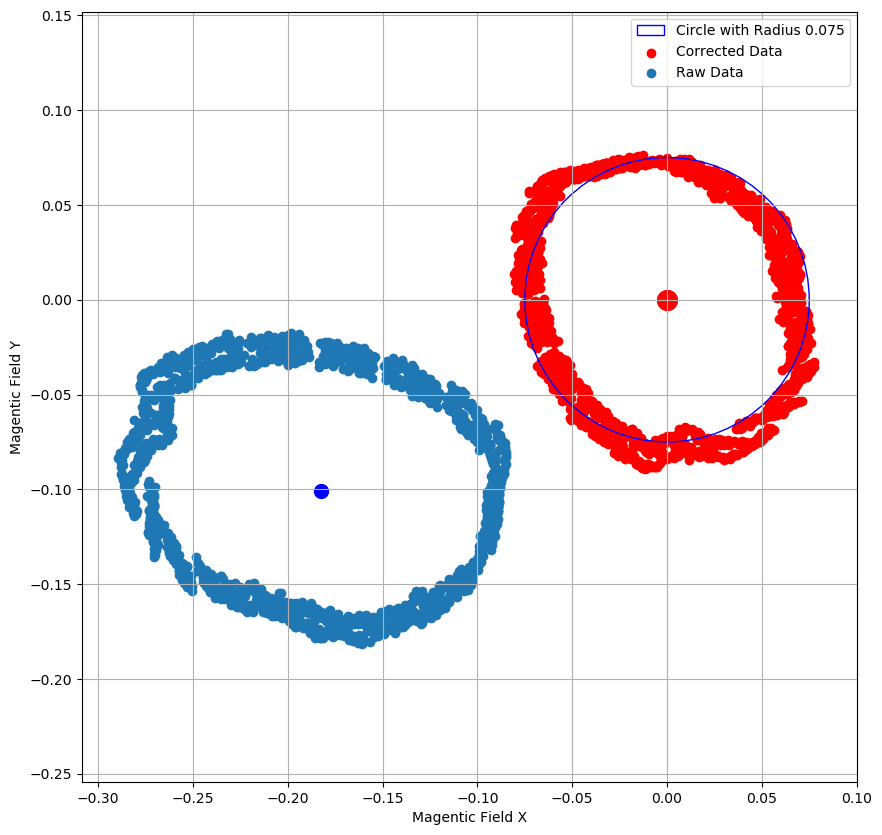

In [15]:
theta1=1.698
df_mag['Magx_rotated'] = (df_mag['Magx_rotated1'] * np.cos(-theta1) - df_mag['Magy_rotated1']* np.sin(-theta1))
df_mag['Magy_rotated'] = (df_mag['Magx_rotated1'] * np.sin(-theta1) + df_mag['Magy_rotated1']* np.cos(-theta1))

# Plot original and rotated data
plt.figure(figsize=(10, 10))

plt.scatter(df_mag['Magx_rotated'], df_mag['Magy_rotated'], color='red', label='Corrected Data')
plt.scatter(x=df_mag['field.MagField.magnetic_field.x'], y=df_mag['field.MagField.magnetic_field.y'], label='Raw Data')
plt.scatter(0, 0, color='red', marker='o', s=200)
plt.scatter(x_off, y_off, color='blue', marker='o', s=100)
plt.xlabel('Magentic Field X')
plt.ylabel('Magentic Field Y')
radius = 0.075
plt.scatter(0, 0, color='red', marker='o', s=200)

# Create a circle with center at (0, 0) and given radius
circle = plt.Circle((0, 0), radius, color='blue', fill=False, label=f'Circle with Radius {radius}')


# Plot the circle
plt.gca().add_patch(circle)
# plt.legend()
plt.axis('equal')
plt.grid(True)
plt.legend()
# plt.title(f'Data Rotated by {theta} radians')
plt.savefig('Corrected Magnetic field')
plt.show()

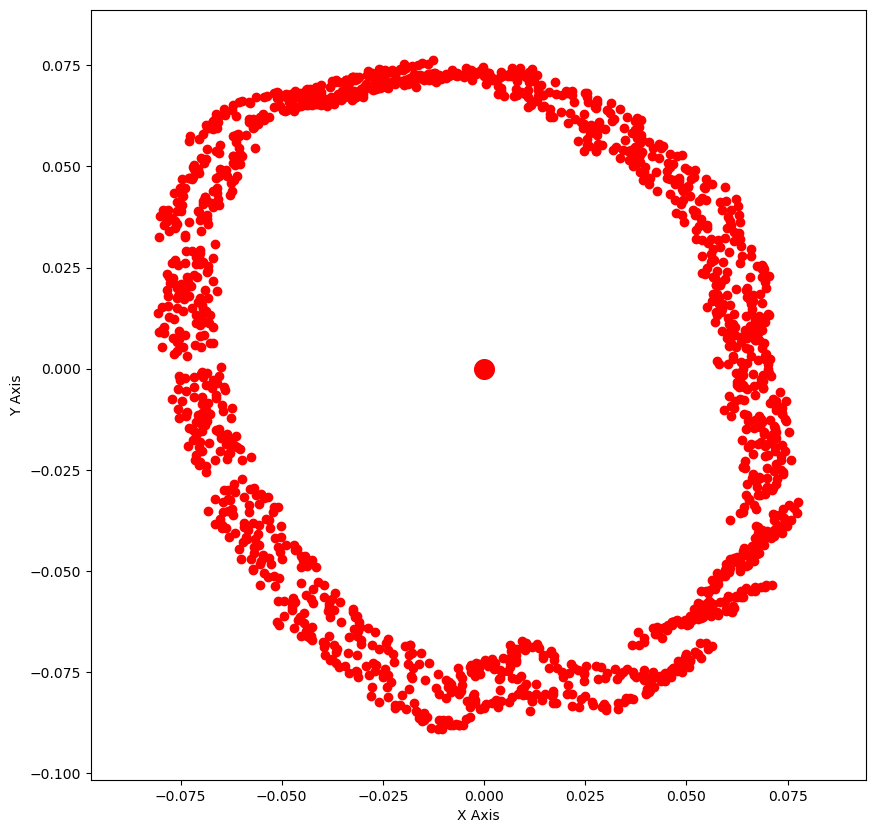

In [16]:

plt.figure(figsize=(10, 10))

plt.scatter(df_mag['Magx_rotated'], df_mag['Magy_rotated'], color='red', label='Corrected Data')

plt.xlabel('X Axis')
plt.ylabel('Y Axis')

radius = 0.075
plt.scatter(0, 0, color='red', marker='o', s=200)

# Create a circle with center at (0, 0) and given radius
circle = plt.Circle((0, 0), radius, color='blue', fill=False, label=f'Circle with Radius {radius}')


# Plot the circle
# plt.gca().add_patch(circle)
 
plt.axis('equal')


plt.show()

In [17]:
from tf.transformations import euler_from_quaternion, quaternion_from_euler
from geometry_msgs.msg import Quaternion

# print(df_mag['field.IMU.orientation.w'])
q=Quaternion()
roll =[]
pitch =[]
yaw=[]
for i in range(2424, 4024):
    q.x = df_mag['field.IMU.orientation.x'][i]
    q.y =  df_mag['field.IMU.orientation.y'][i]
    q.z = df_mag['field.IMU.orientation.z'][i]
    q.w =  df_mag['field.IMU.orientation.w'][i]
    qlist = [q.x, q.y, q.z, q.w]
    (r, p, y) = euler_from_quaternion(qlist)
    roll.append(r)
    pitch.append(p)
    yaw.append(y)
    


In [18]:
print(yaw)

[0.016982053621904743, 0.009581857593448756, 0.002129301687433375, -0.005270894341023369, -0.012723450247039102, -0.020280725908173137, -0.027733281814189405, -0.03520329101272525, -0.042708206796300746, -0.05014330940979716, -0.057613318608332166, -0.0651705942694682, -0.07267551005304485, -0.08018042583662068, -0.0877551547902756, -0.0953473370364511, -0.1028871594050669, -0.11058406140636115, -0.11824605682261509, -0.12587314565383143, -0.13357004765512556, -0.14124949636390186, -0.14894639836519707, -0.1568003799991712, -0.16463690834062625, -0.1724559833895599, -0.18037977819361428, -0.18832102629018743, -0.19622736780172326, -0.20425588236089584, -0.2122494903350312, -0.2201907384316036, -0.22818434640573973, -0.2361779543798734, -0.2441017491839268, -0.25211281045058176, -0.26008896513219476, -0.26797785335120916, -0.27602382120290403, -0.2839825225919972, -0.2919237706885712, -0.2999871918327861, -0.30798079980692006, -0.31597440778105257, -0.32400292234022654, -0.3319790770218

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x=df_mag['field.Header.stamp'], y=yaw)

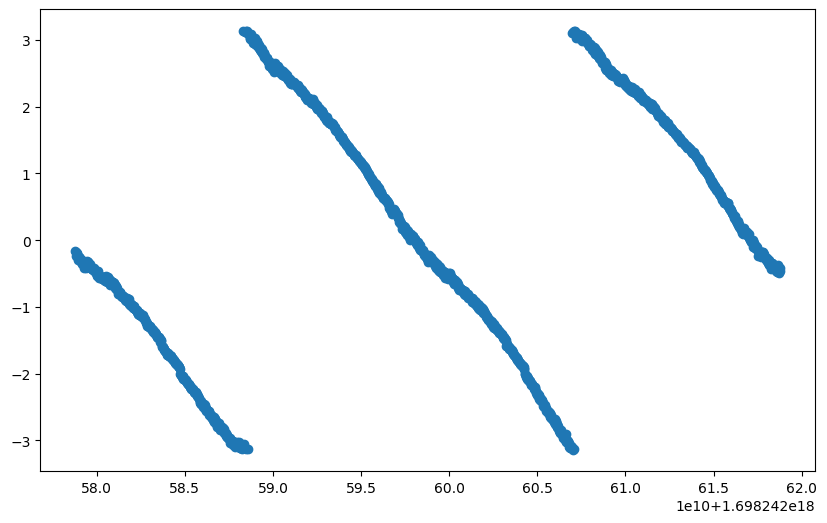

In [20]:
df_mag['Mag_yaw'] = np.arctan2(df_mag['Magx_rotated'], df_mag['Magy_rotated'])

plt.figure(figsize=(10,6))
plt.scatter(x=df_mag['field.Header.stamp'], y=df_mag['Mag_yaw'])

In [21]:
import pandas as pd
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

cutoff_frequency = 15 # Cutoff frequency in Hz (adjust as needed)
sampling_frequency = 40  
order = 1  

nyquist_frequency = 0.5 * sampling_frequency

# Calculate normalized cutoff frequency
normalized_cutoff = cutoff_frequency / nyquist_frequency

# Design low-pass filter using Butterworth filter
b, a = butter(order, Wn=normalized_cutoff, btype='low')

# Apply the filter to the yaw estimates
filtered_yaw = filtfilt(b, a, df_mag['Mag_yaw'])

df_mag['filtered_yaw_mag'] = filtered_yaw

plt.figure(figsize=(10, 6))
plt.scatter(df_mag['field.Header.stamp'],df_mag['Mag_yaw'], label='Original Yaw Estimate')
plt.scatter(df_mag['field.Header.stamp'],df_mag['filtered_yaw_mag'], label='Low-Pass Filtered Yaw Estimate', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('Yaw Estimate (degrees)')
plt.legend()
plt.title('Low-Pass Filter Example for Magnetometer Yaw Estimate')
plt.show()


In [22]:
# Taking Yaw at start as 0 from the yaw data

angular_velocity_z = df_mag['field.IMU.angular_velocity.z'] 
dt = 0.025 

integrated_yaw = np.cumsum(angular_velocity_z) * dt

wrapped_yaw = np.mod(integrated_yaw + np.pi, 2 * np.pi) - np.pi

df_mag['yaw_int'] = wrapped_yaw

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(x=df_mag['field.Header.stamp'], y=df_mag['yaw_int'])

In [24]:
a=0.9
plt.figure(figsize=(16,10))
df_mag['Yaw_com'] = (a * df_mag['yaw_int']) + ((1-a)*df_mag['filtered_yaw_mag'])

plt.scatter(x=df_mag['field.Header.stamp'], y=df_mag['Yaw_com'])
plt.scatter(x=df_mag['field.Header.stamp'], y=yaw, color='red')

plt.show()


In [25]:
df_imu['Mag_x_hard'] = df_imu['field.MagField.magnetic_field.x'] - x_off
df_imu['Mag_y_hard'] = df_imu['field.MagField.magnetic_field.y'] - y_off

In [26]:
df_imu['Magx_rotated1'] = (df_imu['Mag_x_hard'] * np.cos(-theta) - df_imu['Mag_y_hard']* np.sin(-theta))/1.25
df_imu['Magy_rotated1'] = (df_imu['Mag_x_hard'] * np.sin(-theta) + df_imu['Mag_y_hard']* np.cos(-theta))


In [34]:
theta1=-3.14
df_imu['Magx_rotated'] = (df_imu['Magx_rotated1'] * np.cos(-theta1) - df_imu['Magy_rotated1']* np.sin(-theta1))
df_imu['Magy_rotated'] = (df_imu['Magx_rotated1'] * np.sin(-theta1) + df_imu['Magy_rotated1']* np.cos(-theta1))

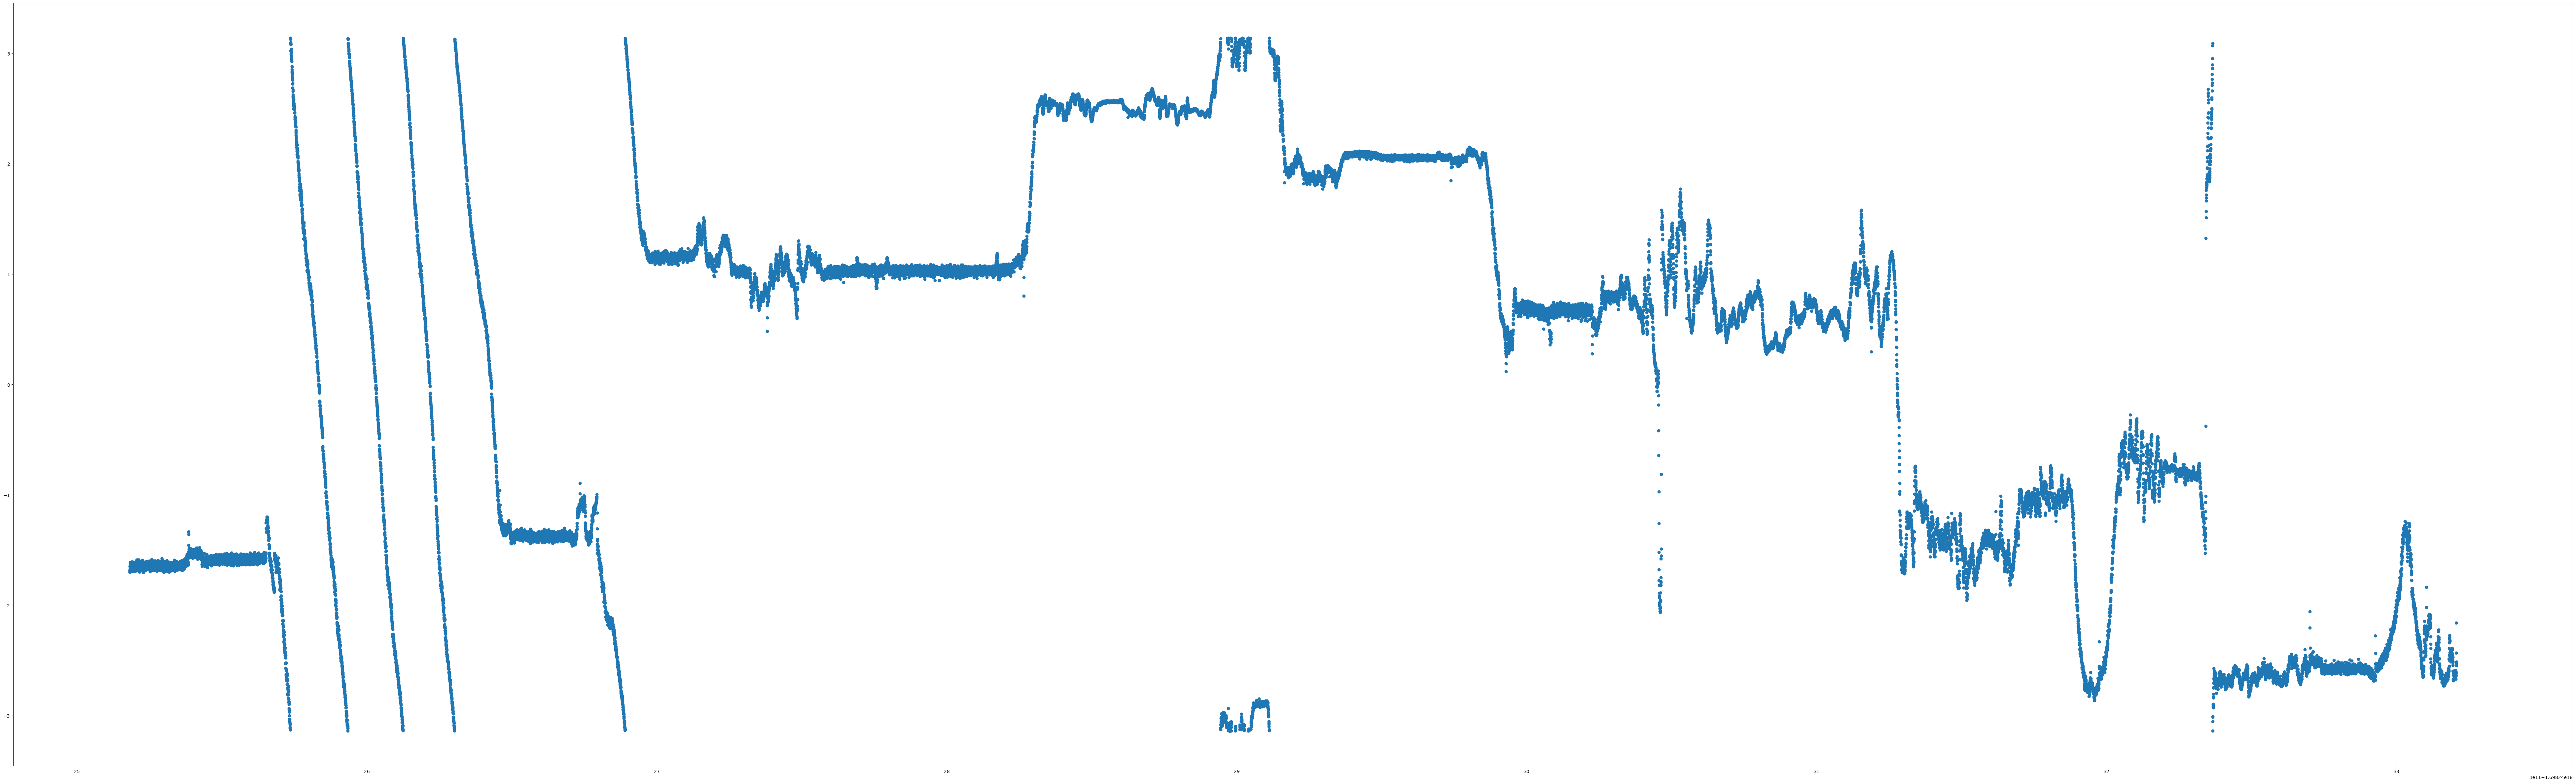

In [35]:
df_imu['Mag_yaw'] = np.arctan2(df_imu['Magx_rotated'], df_imu['Magy_rotated'])

plt.figure(figsize=(100,30))
plt.scatter(x=df_imu['field.Header.stamp'], y=df_imu['Mag_yaw'])
plt.show()

In [36]:
import pandas as pd
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

cutoff_frequency = 15 # Cutoff frequency in Hz (adjust as needed)
sampling_frequency = 40  
order = 1  

nyquist_frequency = 0.5 * sampling_frequency

# Calculate normalized cutoff frequency
normalized_cutoff = cutoff_frequency / nyquist_frequency

# Design low-pass filter using Butterworth filter
b, a = butter(order, Wn=normalized_cutoff, btype='low')

# Apply the filter to the yaw estimates
filtered_yaw = filtfilt(b, a, df_imu['Mag_yaw'])

df_imu['filtered_yaw_mag'] = filtered_yaw
plt.figure(figsize=(100,30))
# plt.figure(figsize=(10, 6))
plt.scatter(df_imu['field.Header.stamp'],df_imu['Mag_yaw'], label='Original Yaw Estimate')
plt.scatter(df_imu['field.Header.stamp'],df_imu['filtered_yaw_mag'], label='Low-Pass Filtered Yaw Estimate', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('Yaw Estimate (degrees)')
plt.legend()
plt.title('Low-Pass Filter Example for Magnetometer Yaw Estimate')
plt.show()


In [37]:
from tf.transformations import euler_from_quaternion, quaternion_from_euler
from geometry_msgs.msg import Quaternion

# print(df_mag['field.IMU.orientation.w'])
q=Quaternion()
roll =[]
pitch =[]
yaw=[]
for i in range(0, len(df_imu['field.IMU.orientation.x'])):
    q.x = df_imu['field.IMU.orientation.x'][i]
    q.y =  df_imu['field.IMU.orientation.y'][i]
    q.z = df_imu['field.IMU.orientation.z'][i]
    q.w =  df_imu['field.IMU.orientation.w'][i]
    qlist = [q.x, q.y, q.z, q.w]
    (r, p, y) = euler_from_quaternion(qlist)
    roll.append(r)
    pitch.append(p)
    yaw.append(y)

print(len(yaw))
    

32082


In [38]:
# Taking Yaw at start as 0 from the yaw data

angular_velocity_z = df_imu['field.IMU.angular_velocity.z'] 
dt = 0.025 

integrated_yaw = np.cumsum(angular_velocity_z) * dt

wrapped_yaw = np.mod(integrated_yaw + np.pi, 2 * np.pi) - np.pi

df_imu['yaw_int'] = wrapped_yaw

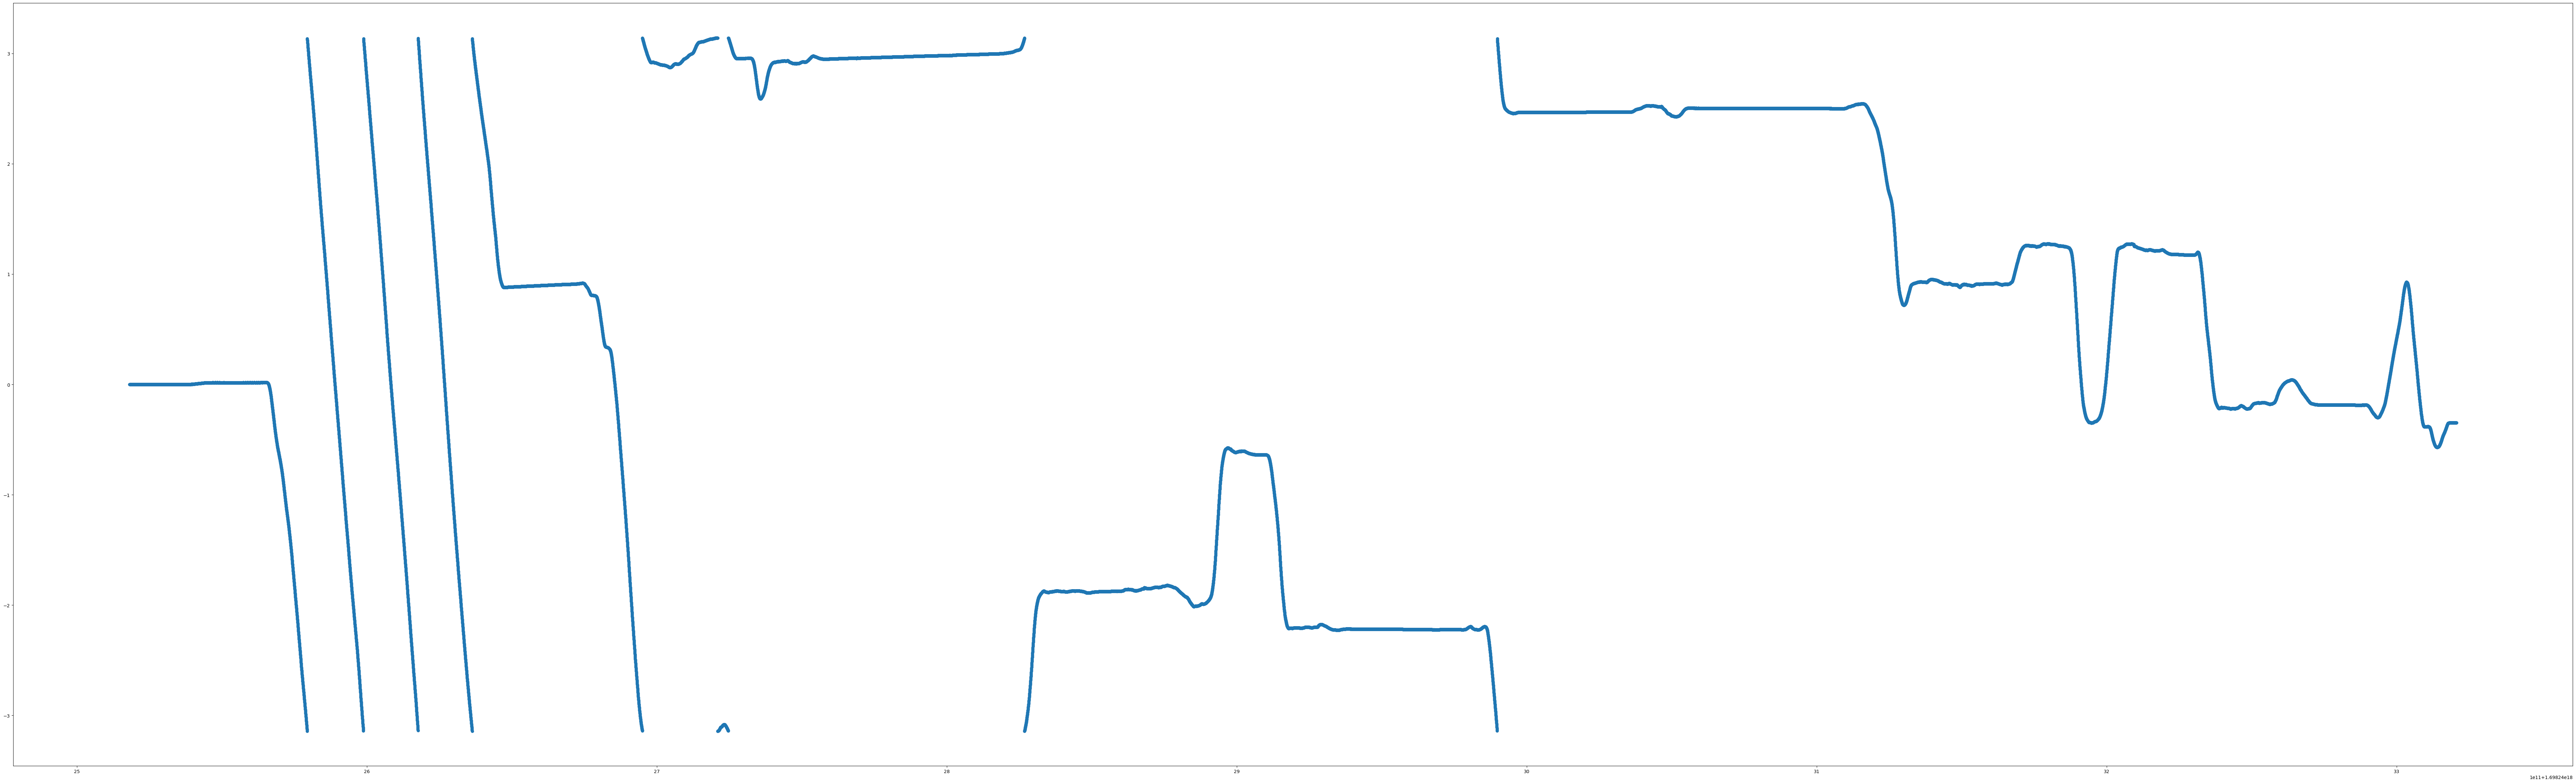

In [39]:
plt.figure(figsize=(100,30))
plt.scatter(x=df_imu['field.Header.stamp'], y=df_imu['yaw_int'])

In [49]:
a=0.95
plt.figure(figsize=(200,30))
df_imu['Yaw_com'] = wrapped_yaw = np.mod(((a * df_imu['yaw_int']) + ((1-a)*df_imu['filtered_yaw_mag']) +np.pi)+ np.pi, 2 * np.pi) - np.pi

plt.scatter(x=df_imu['field.Header.stamp'], y=df_imu['Yaw_com'])
plt.scatter(x=df_imu['field.Header.stamp'], y=yaw, color='red')
plt.legend(fontsize=120)

plt.xticks(fontsize=80)  
plt.yticks(fontsize=80)
plt.show()


No handles with labels found to put in legend.
